# Do you know your stroke risk?

Source of the data: https://www.sciencedirect.com/science/article/pii/S0933365719302295?via%3Dihub
Liu, Tianyu; Fan, Wenhui; Wu, Cheng (2019), “Data for: A hybrid machine learning approach to cerebral stroke prediction based on imbalanced medical-datasets”, Mendeley Data, V1, doi: 10.17632/x8ygrw87jw.1

The medical dataset contains 43,400 records of potential patients which includes 783 occurrences of stroke. 

Cerebral stroke has become a significant global public health issue. The ideal solution to this concern is to prevent in advance by controlling related metabolic factors. However, it is difficult for medical staff to decide whether special precautions are needed for a potential patient only based on the monitoring of physiological indicators unless they are obviously abnormal. This project builds a machine learning model to predict whether someone is at risk of having a stroke.

The data in each row includes numerical factors, such as age and average glucose levels, and categorical factors, such as "has heart disease" (yes or no), work type, and smoking status. This is not an exhaustive list. We use this data to determine which factors contribute to having a stroke, and among those which hold the most weight.

## Basic analysis of the input dataset

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
#import seaborn as sns
%matplotlib inline
#sns.set_style('whitegrid')
import tensorflow
#tensorflow.keras.__version__
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Read the golf course dataset
input_csv = pd.read_csv("data/stroke_dataset.csv", delimiter=',', skipinitialspace=True)
input_csv.shape

(43400, 12)

### Neural Network Code Below

In [2]:
def neural_net(X,y, filename):
    dim = X.shape[1]
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50)
    print(X_test.shape)
    print(y_test.shape)
    X_scaler = MinMaxScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    # Step 1: Label-encode data set
    label_encoder = LabelEncoder()
    label_encoder.fit(y_train)
    encoded_y_train = label_encoder.transform(y_train)
    encoded_y_test = label_encoder.transform(y_test)
    # Step 2: Convert encoded labels to one-hot-encoding
    y_train_categorical = to_categorical(encoded_y_train)
    y_test_categorical = to_categorical(encoded_y_test)
    

    
    # Create model and add layers
    model = Sequential()
    model.add(Dense(units=55, activation='relu', input_dim=dim))
    model.add(Dense(units=55, activation='relu'))
    model.add(Dense(units=55, activation='relu'))
    model.add(Dense(units=2, activation='softmax'))
    
    # Compile and fit the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.summary()
    model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=1
    )
    model_loss, model_accuracy = model.evaluate(
        X_test_scaled, y_test_categorical, verbose=2)
    
    print("/n")
    print("Test Results")
    print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")
    
    
    
    uniqueValues_train, occurCount_train = np.unique(y_train, return_counts=True)
    uniqueValues_test, occurCount_test = np.unique(y_test, return_counts=True)
    print(f"train unique values {uniqueValues_train}")
    print(f"train occur count {occurCount_train}")
    
    print(f"test unique values {uniqueValues_test}")
    print(f"test occur count {occurCount_test}")
   
    model.save(filename+".h5")
    
    return 

In [3]:
# Display the input data for preview
input_csv

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


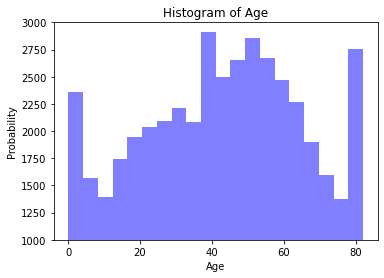

In [4]:
#plotting histogram of age

x = input_csv['age']
num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.ylim([1000, 3000])
# add a 'best fit' line
#y = mlab.normpdf(bins, mu, sigma)

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title(r'Histogram of Age')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

### Looking into balanced datasets

In [5]:
stroke_data_df = input_csv.copy(deep=True)

In [6]:
stroke_data_df = stroke_data_df.dropna()


In [7]:
stroke_data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [8]:
stroke_data_df.shape

(29072, 12)

### Isolating Positive Stroke Data

In [9]:
stroke_positive = stroke_data_df[stroke_data_df['stroke'] == 1]

In [10]:
stroke_positive.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
63,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
141,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
257,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
264,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
288,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [11]:
stroke_positive.shape

(548, 12)

## Isolating Negative Stroke Data

In [12]:
stroke_negative = stroke_data_df[stroke_data_df['stroke'] == 0]

In [13]:
stroke_negative.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [14]:
stroke_negative.shape

(28524, 12)

In [15]:
print(f"Total Number of Stroke Positive {len(stroke_positive)}")
print(f"Total Number of Stroke Negative {len(stroke_negative)}")

Total Number of Stroke Positive 548
Total Number of Stroke Negative 28524


## Mapping String Data to Numeric



In [16]:
Gender = {"Other":2,"Male":1, "Female":0}
Married = {"Yes":1, "No":0}
Work_Type = {"Private":0, "Self-employed":1, "children":2, 
             "Govt_job":3,"Never_worked":4}
Residence = {"Urban":0, "Rural":1}
Smoking = {"never smoked":0, "formerly smoked":1, "smokes":2, "unknown":3}

In [17]:
stroke_negative["smoking_status"].value_counts()

never smoked       15491
formerly smoked     6919
smokes              6114
Name: smoking_status, dtype: int64

In [18]:
stroke_negative = stroke_negative.replace({"gender":Gender, "ever_married":Married,
                                          "work_type":Work_Type, "Residence_type":Residence,
                                          "smoking_status":Smoking})

In [19]:
stroke_positive = stroke_positive.replace({"gender":Gender, "ever_married":Married,
                                          "work_type":Work_Type, "Residence_type":Residence,
                                          "smoking_status":Smoking})

In [20]:
stroke_negative.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,1,58.0,1,0,1,0,0,87.96,39.2,0,0
3,56543,0,70.0,0,0,1,0,1,69.04,35.9,1,0
6,52800,0,52.0,0,0,1,0,0,77.59,17.7,1,0
7,41413,0,75.0,0,1,1,1,1,243.53,27.0,0,0
8,15266,0,32.0,0,0,1,0,1,77.67,32.3,2,0


In [21]:
stroke_negative["ever_married"].value_counts()

1    21199
0     7325
Name: ever_married, dtype: int64

In [22]:
stroke_negative.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

## Creating various Datasets

### Creating Data Set for Analysis - Equal set

In [84]:
stroke_negative_sample = stroke_negative.sample(1096)
stroke_positive_sample = stroke_positive.sample(548)

In [85]:
stroke_sample = pd.merge(stroke_negative_sample, stroke_positive_sample, how = 'outer')

In [86]:
print(f"Negative data set {len(stroke_negative_sample)}")
print(f"Positive data set {len(stroke_positive_sample)}")
print(f"Combined data set {len(stroke_sample)}")
print(f"Shape of combined {stroke_sample.shape}")

Negative data set 1096
Positive data set 548
Combined data set 1644
Shape of combined (1644, 12)


In [87]:
X = stroke_sample.drop("stroke", axis = 1)
y = stroke_sample["stroke"]
print(X.shape, y.shape)

(1644, 11) (1644,)


In [88]:
neural_net(X,y, "NN_3")

(411, 11)
(411,)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 55)                660       
_________________________________________________________________
dense_21 (Dense)             (None, 55)                3080      
_________________________________________________________________
dense_22 (Dense)             (None, 55)                3080      
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 112       
Total params: 6,932
Trainable params: 6,932
Non-trainable params: 0
_________________________________________________________________
Train on 1233 samples
Epoch 1/100
1233/1233 [==============================] - 1s 979us/sample - loss: 0.6576 - accuracy: 0.6577
Epoch 2/100
1233/1233 [==============================] - 0s 88us/sample - loss: 0.5870 - accuracy: 0.677

1233/1233 [==============================] - 0s 115us/sample - loss: 0.2915 - accuracy: 0.8581
Epoch 69/100
1233/1233 [==============================] - 0s 101us/sample - loss: 0.2932 - accuracy: 0.8556
Epoch 70/100
1233/1233 [==============================] - 0s 110us/sample - loss: 0.2864 - accuracy: 0.8727
Epoch 71/100
1233/1233 [==============================] - 0s 105us/sample - loss: 0.2857 - accuracy: 0.8637
Epoch 72/100
1233/1233 [==============================] - 0s 119us/sample - loss: 0.2821 - accuracy: 0.8564
Epoch 73/100
1233/1233 [==============================] - 0s 109us/sample - loss: 0.2770 - accuracy: 0.8678
Epoch 74/100
1233/1233 [==============================] - 0s 122us/sample - loss: 0.2808 - accuracy: 0.8662
Epoch 75/100
1233/1233 [==============================] - 0s 122us/sample - loss: 0.2759 - accuracy: 0.8686
Epoch 76/100
1233/1233 [==============================] - 0s 108us/sample - loss: 0.2722 - accuracy: 0.8710
Epoch 77/100
1233/1233 [=================

## Loading a model to test performance

In [89]:
# Load the model

from tensorflow.keras.models import load_model
filename = "NN_3"
stroke_model = load_model(filename+".h5")

In [90]:
stroke_negative_sample = stroke_negative.sample(20000)
stroke_positive_sample = stroke_positive.sample(548)
stroke_sample = pd.merge(stroke_negative_sample, stroke_positive_sample, how = 'outer')

In [91]:
X = stroke_sample.drop("stroke", axis = 1)
y = stroke_sample["stroke"]
print(X.shape, y.shape)

(20548, 11) (20548,)


In [92]:
X_scaler = MinMaxScaler().fit(X)
X_scaled = X_scaler.transform(X)

In [93]:
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
y_categorical = to_categorical(encoded_y)


In [94]:
encoded_predictions = stroke_model.predict_classes(X_scaled)

In [95]:
encoded_predictions[1499]

0

In [96]:
encoded_y[0]

0

In [97]:
TN = 0
TP = 0
FN = 0
FP = 0
for i in range(0,len(encoded_y)):
    if encoded_predictions[i] == 0:
        if encoded_y[i] == 0:
            TN += 1
        else:
            FN += 1
    if encoded_predictions[i] == 1:
        if encoded_y[i] == 1:
            TP += 1
        else: 
            FP += 1
total = FP+FN+TN+TP
print(f"Total samples: {total}")
print(f"True Positive: {TP}")
print(f"True Negative: {TN}")
print(f"False Positive: {FP}")
print(f"False Negative: {FN}")

Total samples: 20548
True Positive: 416
True Negative: 15924
False Positive: 4076
False Negative: 132
